# Figure 1

In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl

## Settings

In [19]:
TEXT_WIDTH = 6.7261  # in
DPI = 350

In [20]:
def set_font_size(font_size):
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size, title_fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)   # fontsize of the figure title

In [21]:
sb.set(context='paper', style='whitegrid')
plt.rc('grid', linewidth=0.3)
sb.set_palette('colorblind')
set_font_size(6)

## Load Data

In [22]:
# todo once data is generated

(1826, 2892, 3)


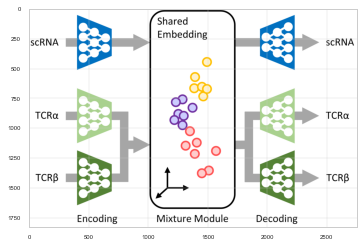

In [23]:
img_model = mpl.image.imread('figures/01a_model.png')
print(img_model.shape)
img_model = img_model[:, 100:2852]
plt.imshow(img_model)

(708, 1086, 3)


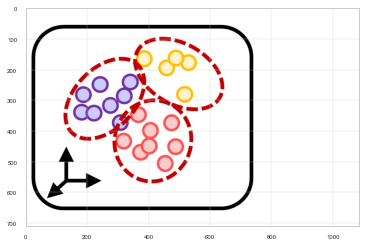

In [24]:
img_clustering = mpl.image.imread('figures/01b_clustering.png')
print(img_clustering.shape)
#img_clustering = img_clustering[45:663, 10:746]
plt.imshow(img_clustering)

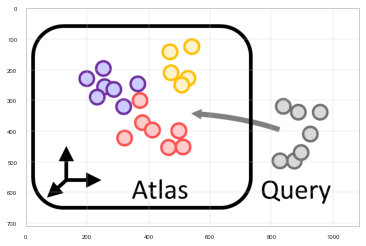

In [25]:
img_atlas = mpl.image.imread('figures/01c_atlas.png')
#img_atlas = img_atlas[45:658, 60:1066]
plt.imshow(img_atlas)

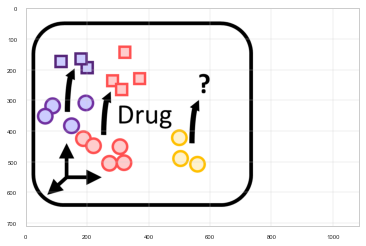

In [26]:
img_modulation = mpl.image.imread('figures/01d_modulation.png')
#img_modulation = img_modulation[35:653, 10:746]
plt.imshow(img_modulation)

In [27]:
metrics_10x = ['Prediction test', 'NMI']
data_performance_donor_1 = pd.read_csv('results/performance_10x_donor_1.csv', index_col=0)
data_performance_donor_1 = data_performance_donor_1[data_performance_donor_1['metrics'].isin(metrics_10x)]

In [28]:
data_performance_donor_2 = pd.read_csv('results/performance_10x_donor_2.csv', index_col=0)
data_performance_donor_2 = data_performance_donor_2[data_performance_donor_2['metrics'].isin(metrics_10x)]

In [29]:
metrics_covid = ['NMI_cell_type', 'NMI_reactivity']
data_performance_covid = pd.read_csv('results/performance_covid.csv', index_col=0)
data_performance_covid = data_performance_covid[data_performance_covid['metrics'].isin(metrics_covid)]

## Plot Image

In [30]:
def plot_barplot(data, fig, ax):
    order = ['rna', 'tcr', 'moe', 'concat', 'poe']
    plot = sb.barplot(data=data, x='model', y='scores', hue='metrics', order=order, ax=ax)
    
    ax.grid(False)
    sb.despine(ax=ax)

In [31]:
def plot_image(img, fig, ax):
    ax.imshow(img)
    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])

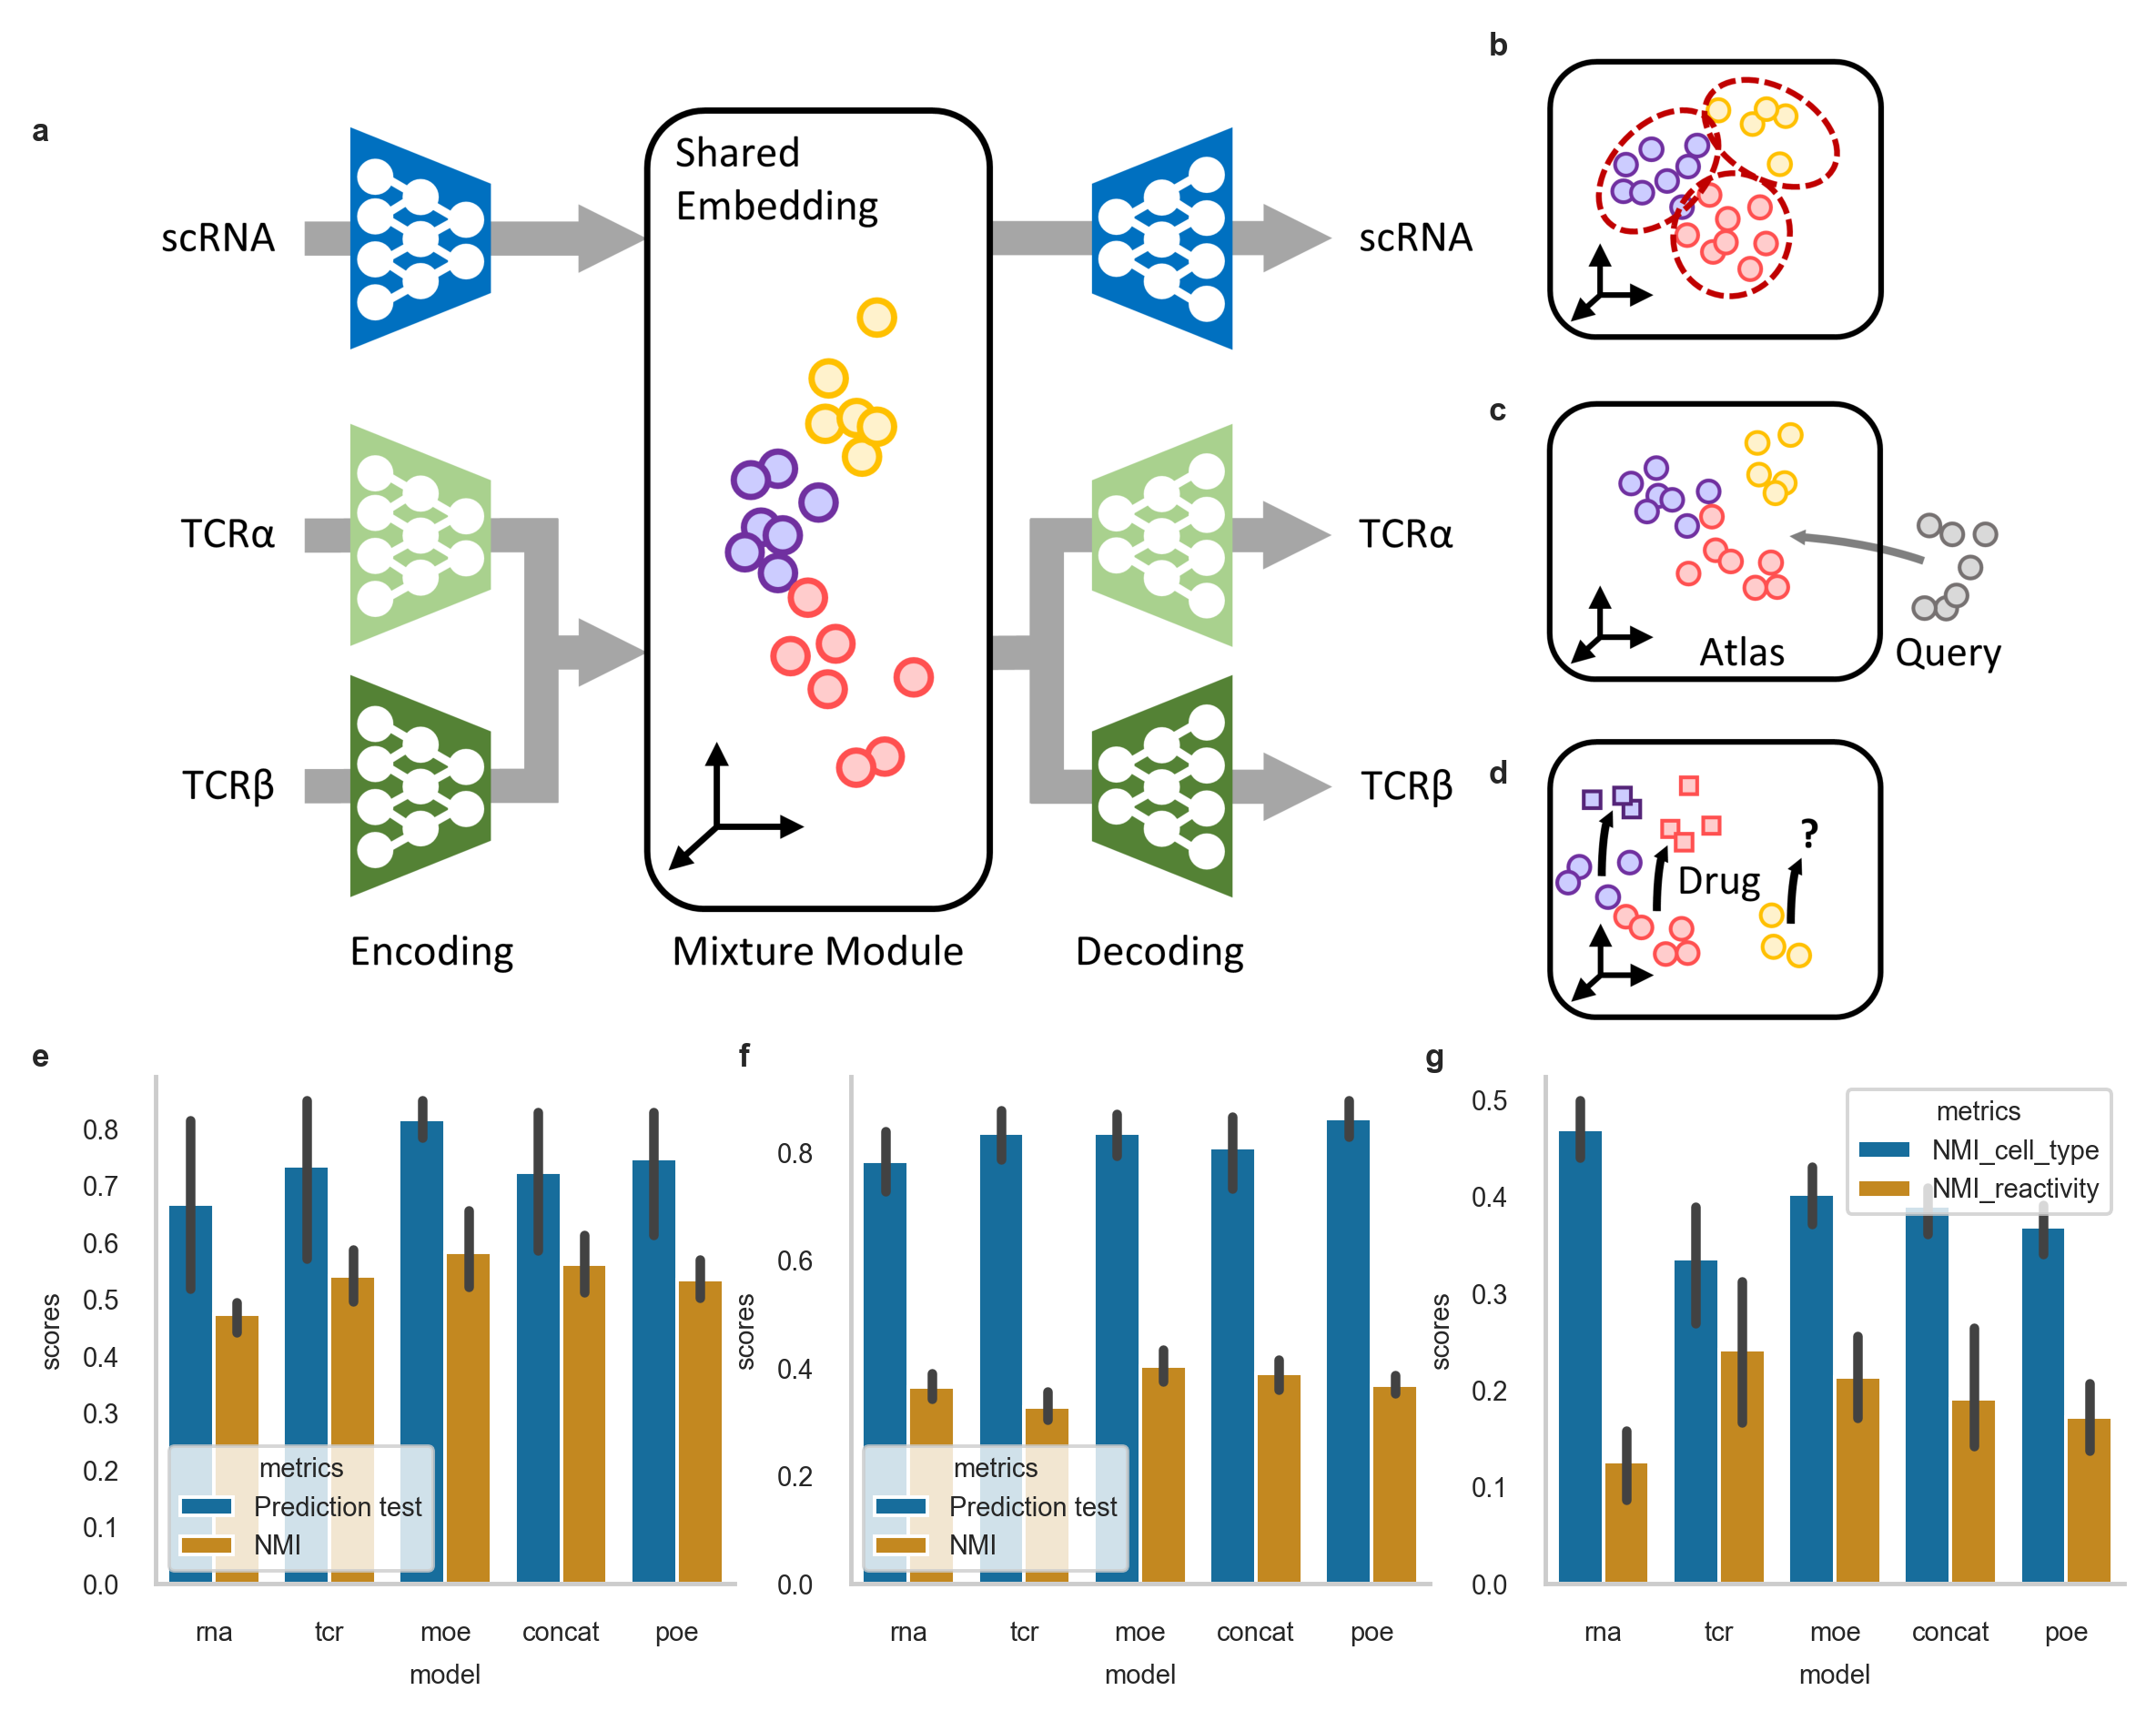

In [32]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 0.8),
                 dpi=DPI)
gridspecs = {}
axes = {}

gridspecs["gs_1234567"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=1,
    height_ratios=[2, 1],
    width_ratios=[1],
    #wspace=0.1,
    #hspace=2/3,
)

gridspecs["gs_1234"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_1234567"][0],
    nrows=1,
    ncols=2,
    height_ratios=[1],
    width_ratios=[6, 3],
    wspace=-0.025,
    #hspace=1,
)

gridspecs["gs_234"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_1234"][1],
    nrows=3,
    ncols=1,
    height_ratios=[1, 1, 1],
    width_ratios=[1],
    #wspace=0.2,
    #hspace=0.25,
)

gridspecs["gs_567"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_1234567"][1],
    nrows=1,
    ncols=3,
    height_ratios=[1],
    width_ratios=[1, 1, 1],
    #wspace=0.2,
    #hspace=0.25,
)

axes["ax_1"] = fig.add_subplot(gridspecs["gs_1234"][0])
axes["ax_2"] = fig.add_subplot(gridspecs["gs_234"][0])
axes["ax_3"] = fig.add_subplot(gridspecs["gs_234"][1])
axes["ax_4"] = fig.add_subplot(gridspecs["gs_234"][2])
axes["ax_5"] = fig.add_subplot(gridspecs["gs_567"][0])
axes["ax_6"] = fig.add_subplot(gridspecs["gs_567"][1])
axes["ax_7"] = fig.add_subplot(gridspecs["gs_567"][2])

plot_image(img_model, fig, axes['ax_1'])

plot_image(img_clustering, fig, axes['ax_2'])
plot_image(img_atlas, fig, axes['ax_3'])
plot_image(img_modulation, fig, axes['ax_4'])

plot_barplot(data_performance_donor_1, fig, axes['ax_5'])
plot_barplot(data_performance_donor_2, fig, axes['ax_6'])
plot_barplot(data_performance_covid, fig, axes['ax_7'])

fig.text(0.01, 0.92, 'a', size='large', weight='bold')

fig.text(0.69, 0.97, 'b', size='large', weight='bold')
fig.text(0.69, 0.757, 'c', size='large', weight='bold')
fig.text(0.69, 0.545, 'd', size='large', weight='bold')

fig.text(0.01, 0.38, 'e', size='large', weight='bold')
fig.text(0.34, 0.38, 'f', size='large', weight='bold')
fig.text(0.66, 0.38, 'g', size='large', weight='bold')

fig.tight_layout()
fig.savefig('figures/01_overview_performance.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('figures/01_overview_performance.png',
           dpi=DPI, bbox_inches='tight')

In [33]:
data_pred_tmp = data_performance_donor_1[data_performance_donor_1['metrics']=='Prediction test']
data_pred_tmp.groupby('model')['scores'].mean()

model
concat    0.723679
moe       0.817388
poe       0.748436
rna       0.667646
tcr       0.734800
Name: scores, dtype: float64

In [34]:
data_pred_tmp = data_performance_donor_1[data_performance_donor_1['metrics']=='NMI']
data_pred_tmp.groupby('model')['scores'].mean()

model
concat    0.562815
moe       0.583374
poe       0.535455
rna       0.474264
tcr       0.541161
Name: scores, dtype: float64